# PLANTILLA MODELIZACIÓN PARA CLASIFICACIÓN

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de algoritmos a testar
* Reducir el número de parámetros a testar
* Usar random search y especificar un n_iter adecuado

## IMPORTAR PAQUETES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [3]:
ruta_proyecto = 'C:/Users/esteb/Escritorio/carpeta/Estudios/DS4B/03_MACHINE_LEARNING/08_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [4]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [5]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [6]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [7]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]},
        
        {'algoritmo': [RandomForestClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__max_depth': [5,10,15],
         'algoritmo__n_estimators': [50,100,200]},
        
        {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]},
        
        {'algoritmo': [HistGradientBoostingClassifier()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [500],
         'algoritmo__scoring': ['roc_auc'],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [8]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'roc_auc',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,param_algoritmo__max_depth,...,param_algoritmo__max_iter,param_algoritmo__min_samples_leaf,param_algoritmo__scoring,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
64,2.70,0.11,0.03,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1,NaN,NaN,5,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.88,0.88,0.90,0.89,0.01,1
364,0.29,0.00,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1,NaN,NaN,5,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.88,0.88,0.89,0.89,0.01,2
61,2.64,0.08,0.03,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1,NaN,NaN,5,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.88,0.88,0.90,0.89,0.01,3
362,0.29,0.01,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1,NaN,NaN,5,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.88,0.88,0.90,0.89,0.01,4
160,1.42,0.01,0.02,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1,NaN,NaN,5,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.88,0.88,0.89,0.89,0.01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.02,0.00,0.00,0.00,LogisticRegression(),0.50,-1,elasticnet,saga,NaN,...,NaN,NaN,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,634
4,0.02,0.00,0.00,0.00,LogisticRegression(),0.25,-1,elasticnet,saga,NaN,...,NaN,NaN,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,634
3,0.00,0.00,0.00,0.00,LogisticRegression(),0,-1,none,saga,NaN,...,NaN,NaN,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,634
2,0.00,0.00,0.00,0.00,LogisticRegression(),0,-1,l2,saga,NaN,...,NaN,NaN,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,634


In [31]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score').iloc[0,:]

mean_fit_time                                                                      2.70
std_fit_time                                                                       0.11
mean_score_time                                                                    0.03
std_score_time                                                                     0.00
param_algoritmo                       XGBClassifier(base_score=None, booster=None, c...
param_algoritmo__C                                                                  NaN
param_algoritmo__n_jobs                                                              -1
param_algoritmo__penalty                                                            NaN
param_algoritmo__solver                                                             NaN
param_algoritmo__max_depth                                                            5
param_algoritmo__n_estimators                                                      1000
param_algoritmo__learning_rate  

####  Con random search

In [9]:
# random_search = RandomizedSearchCV(estimator = pipe,
#                                    param_distributions = grid, 
#                                    n_iter = 5, 
#                                    cv = 3, 
#                                    scoring = 'roc_auc', 
#                                    verbose = 0,
#                                    n_jobs = -1)

# modelo = random_search.fit(train_x,train_y)

# pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

## EVALUAR

### Predecir sobre validación

In [10]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [11]:
roc_auc_score(val_y, pred)

0.8936235497728227

### Examinar el mejor modelo

In [23]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=1000,
                               n_jobs=-1, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [24]:
parametros = modelo.best_estimator_.get_params()
# Imprimir los parámetros
for nombre_parametro, valor_parametro in parametros.items():
    print(f"{nombre_parametro}: {valor_parametro}")

memory: None
steps: [('algoritmo', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...))]
verbose: False
algoritmo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
  

In [13]:
from sklearn.inspection import permutation_importance
permutacion = permutation_importance(modelo.best_estimator_, 
                                     train_x, train_y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

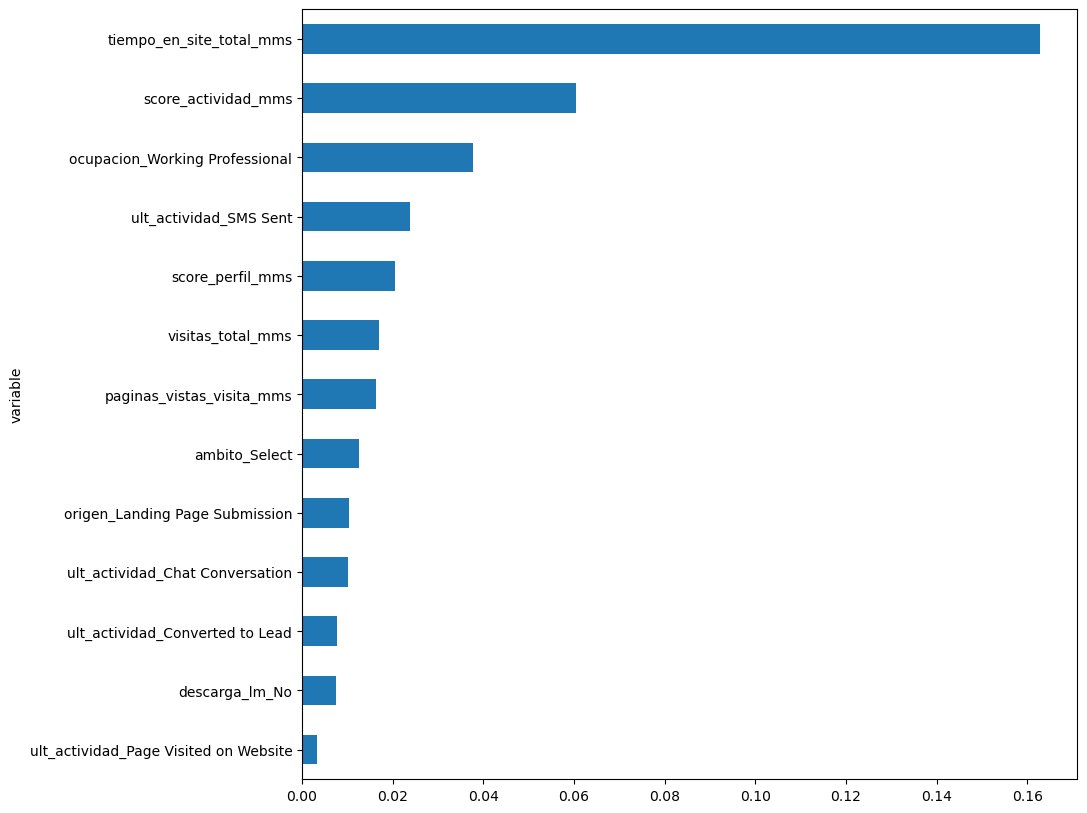

In [14]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

rank_per = ranking_per(train_x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (10,10));

## REPORTING DEL MODELO

### Gain Chart

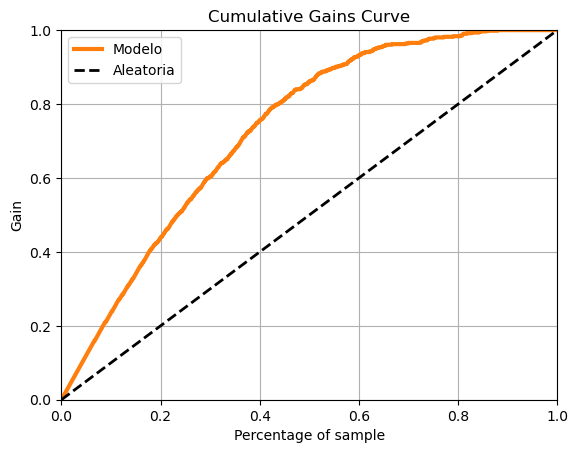

In [15]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

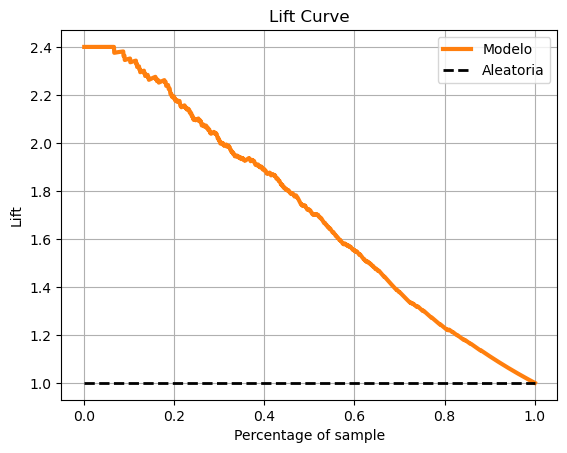

In [16]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()             
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

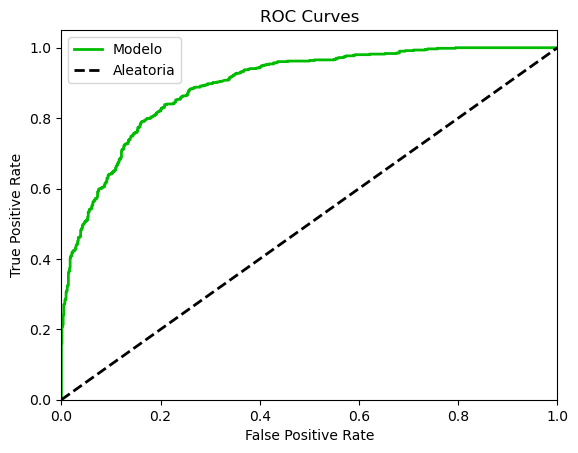

In [17]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()
ax.lines[1].remove()
ax.lines[1].remove()
plt.legend(labels = ['Modelo','Aleatoria']);